In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import *

# from test_utils import test

%load_ext autoreload
%autoreload 2

## Run de A a Z

### Loading  data 

In [2]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("dataset")


### Extract labels 

In [3]:
labels = np.genfromtxt("dataset/x_test.csv", delimiter=",", dtype = str, max_rows=1)
labels = np.delete(labels,0) # delete the label 'id' as we dont have it in x_train and x_test

### Cleaning and feature selection

Due to the high number of features with all different exceptions values and linearity, we decided to select manually the features we found relevant. The list below is the name of the feature, the exception values that we have to remplace, and wheter we remplace by majority (True) or by the mean (False)

In [65]:
label_list = [("MSCODE", [], True),
            ("_HCVU651", [9], True),
            ("_RFHYPE5", [9], True),
            ("_RFCHOL", [9], True),
            ("_RACE",[9], True),
            ("_BMI5",[], False),
            ("_EDUCAG",[9], True),
            ("_INCOMG",[9], True),
            ("_DRNKWEK",[99900], False),
            ("_SMOKER3",[9], True),
            ("_FRUTSUM",[], False),
            ("_VEGESUM",[], False),
            ("PA1MIN_",[], False),
            ("GENHLTH",[7,9], False),
            ("CHECKUP1",[7,9], False),
            ("MENTHLTH",[88, 77, 99], False),
            ("BPHIGH4",[7,9], True),
            ("BPMEDS",[7,9], True),
            ("TOLDHI2",[7,9], True),
            ("CHCOCNCR",[7,8,9], True),
            ("DIABETE3",[7,8,9], True),
            ("SEX",[], True),
            ("QLACTLM2",[7,9], True),
            ("AVEDRNK2",[77, 99], False),
            ("EXERANY2",[7,9], True),
            ("SHINGLE2", [7,9], True),
            ("LMTJOIN3", [7,9], True),
            ("CVDASPRN", [7,9], True)
            ]

#jai retirer #("_DRNKWEK",[99900], True),


# label_list = [
#             ("_RFCHOL", [9], True),
#             ("_SMOKER3",[9], True),
#             ("_DRNKWEK",[99900], False),
#             ("LMTJOIN3", [7,9], True)
#             ]

cleaned_x_train = clean_data(labels, label_list, x_train)

In [58]:
cleaned_x_train

array([[ 1.        ,  1.        , -0.67754031,  2.        ],
       [ 1.        ,  1.        , -0.67754031,  2.        ],
       [ 2.        ,  3.        , -0.55759541,  2.        ],
       ...,
       [ 2.        ,  4.        , -0.67754031,  2.        ],
       [ 1.        ,  4.        , -0.67754031,  2.        ],
       [ 1.        ,  4.        , -0.67754031,  2.        ]])

In [34]:
correlation_matrix = np.corrcoef(cleaned_x_train, rowvar=False)

# Define a correlation threshold (for example, 0.7)
correlation_threshold = 0.7

# Find the indices of uncorrelated columns
uncorrelated_indices = np.where(np.abs(correlation_matrix) < correlation_threshold)

# Get the unique column indices of uncorrelated variables
uncorrelated_columns = np.unique(uncorrelated_indices[1])

# Create a new dataset with uncorrelated variables
uncorrelated_data = cleaned_x_train[:, uncorrelated_columns]

ca change rien mdr ya tjr 28 dans le resultat

## Cleaning in another way

In [7]:
threshold = 0.7  # You want to drop columns with > 50% NaNs
column_count = x_train.shape[0]
max_nan_count = threshold * column_count

# Create a mask to identify columns with too many NaNs
nan_mask = np.sum(np.isnan(x_train), axis=0) <= max_nan_count

# Use the mask to select the columns with fewer NaNs
x_train_filtered = x_train[:, nan_mask]
x_test_filtered = x_test[:, nan_mask]

# drop the 

## Train test split for our own cross validation

In [70]:
x_train_1, y_train_1, x_test_1, y_test_1 = split_train_test(y_train, x_train, 0.7)

In [9]:
cleaned_x_train_1 = clean_data(labels, label_list, x_train_1)
cleaned_x_test_1 = clean_data(labels, label_list, x_test_1)

In [10]:
# want to see which labels are way to small

for label in label_list:
    l, _, _ = label
    id = np.where(labels == l)[0][0]
    x = x_train[:][id]

    # Count the number of NaN values
    nans= np.count_nonzero(np.isnan(x))
    nan_perc = nans/len(x) *100
    print(nan_perc)

46.728971962616825
46.728971962616825
42.05607476635514
32.398753894081
38.940809968847354
41.43302180685358
44.54828660436137
41.74454828660436
41.74454828660436
44.85981308411215
50.155763239875384
42.99065420560748
46.10591900311526
42.679127725856695
36.7601246105919
38.006230529595015
43.925233644859816
42.05607476635514
50.77881619937694
38.31775700934579
39.56386292834891
45.17133956386293
30.8411214953271
42.679127725856695
42.36760124610592
47.35202492211838
52.024922118380054
47.66355140186916


### Training

#### Ridge regression

In [28]:
lambda_ = 0.0001
degree = 25
## tx is cleaned data 
poly = build_poly(cleaned_x_train,degree)
w , loss = ridge_regression(y_train,poly,lambda_)

#### Mean squared errors gd

In [66]:
gamma = 0.00001
max_iters = 10
w_initial = np.zeros(cleaned_x_train.shape[1])

w, loss = mean_squared_error_gd(y_train, cleaned_x_train, w_initial, max_iters, gamma)

0.4993986956091768
[ 1.49149836  0.88424169  1.0928433   1.0681191   1.58292944 -0.02986482
  2.46525858  3.33774353 -0.28192911  2.7891989  -0.09306784  0.01482692
 -0.01443856 -0.14114484  0.03767431 -0.03618673  1.92945536  0.87786506
  1.39991229  1.5784889   2.32960102  1.31729361  1.49201084  0.00610009
  1.00319927  1.63260981  1.55146231  1.63790869]

0.49879843747016817
[ 1.49013674  0.88347635  1.09185108  1.06714858  1.58153353 -0.02985285
  2.46310775  3.33481885 -0.2816681   2.78675625 -0.09298484  0.01482112
 -0.0144288  -0.14111137  0.0376724  -0.03617254  1.92784717  0.87710155
  1.3987285   1.5771201   2.32760551  1.3161583   1.49073496  0.00610813
  1.00231259  1.63118609  1.55012586  1.63648116]

0.49819922376146286
[ 1.48877631  0.88271168  1.09085973  1.0661789   1.58013883 -0.02984088
  2.4609588   3.33189672 -0.28140732  2.78431573 -0.09290191  0.01481534
 -0.01441905 -0.14107794  0.03767048 -0.03615837  1.92624037  0.87633872
  1.39754575  1.57575248  2.32561173

In [13]:
loss

629861112644857.4

#### Mean squared error sgd

In [67]:
gamma = 0.00001
max_iters = 100
w_initial = np.zeros(cleaned_x_train.shape[1])

w, loss = mean_squared_error_sgd(y_train, cleaned_x_train, w_initial, max_iters, gamma)

#### Least squared error

In [15]:
w, loss = least_squares(y_train, cleaned_x_train)

#### logistic regression

In [16]:
max_iters = 1000
gamma = 0.01
w_initial = np.zeros(cleaned_x_train.shape[1])
w, loss = logistic_regression(y_train, cleaned_x_train, w_initial, max_iters, gamma)

c:\Users\duval\Documents\GitHub\ML_project1\helpers.py:96: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))
c:\Users\duval\Documents\GitHub\ML_project1\helpers.py:115: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))
c:\Users\duval\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


#### reg logistic

In [17]:
max_iters = 1000
gamma = 0.01
lambda_ = 0.001
w_initial = np.zeros(cleaned_x_train.shape[1])
w, loss = reg_logistic_regression(y_train, cleaned_x_train, lambda_, w_initial, max_iters, gamma)

In [18]:
print(w)
print(loss)
print(len(w))

[-1.47897652e+01 -8.76754527e+00 -1.08367742e+01 -1.05915697e+01
 -1.56953762e+01  2.95801575e-01 -2.44438059e+01 -3.30948043e+01
 -2.76559928e+01 -2.11760635e+03 -1.01348713e+01 -1.52940074e+01
 -3.06310683e+03  1.39774885e+00 -3.73020669e-01  3.58405166e-01
 -1.91299119e+01 -8.70438288e+00 -1.38800534e+01 -1.56512382e+01
 -2.30982424e+01 -1.30612860e+01 -1.47934087e+01 -6.03157743e-02
 -9.94737356e+00 -1.61880227e+01 -1.53830696e+01 -1.62405490e+01]
nan
28


#### Testing

In [71]:
#clean up x test

cleaned_x_test = clean_data(labels, label_list, x_test)


In [72]:
poly_test = build_poly(cleaned_x_test,degree)
poly_test.shape
                                 

(109379, 701)

#### Prediction

# notes for next one working on this lol

ridge -> build poly -> predict label: Ca marche mais pas très bons résultats (mieux si tu montes le degré mais tres bas F1)

least squares -> predict label : marche pas avec build poly pck pas les bonnes dims (build poly rajoute une colonne, donc impossible de faire data@weight) Ca marche sans, mais on a que 1 valeur a 1, le reste a -1 (et ya pas de params a changer) F1 SCORE 0.000 ACCURACY 0.912

mean squared gd -> (same thing pour build poly) les valeurs sont fucked up mdr [1.13497280e+79 1.72690226e+79 3.20689183e+78 ... 1.36781180e+78 1.99141883e+78 1.76606508e+78] c'est du 10^78 a peu pres, donc ya tout qui fini par etre a 1 et rien a -1 

mean squared sgd -> same as gd mais on est plutot dans du 10^14, et que des negatifs

J'ai aussi tenté ridge en filtrant les données d'une autre manière, aka juste prendre les colonnes qui ont plus que 70% de données (par rapport aux nan) et ca me donne des meilleurs résultats... snif snif donc F1 SCORE 0.139 ACCURACY 0.837 Après j'ai rien clean up or anything donc c'est un peu ridicule genre ya toutes les valeurs d'exceptions encore (en vrai j'ai aucune idée de pourquoi ca a marché ??? Pck j'ai pas enlevé les nan ?? Donc ca a du bader hahahaha)

Si je mets 1000 max_iters ca overflow error, donc j'ai laissé 100, a tester avec 500 par exemple

Idées: Peut être que normalizer les data ca change qqch mour les deux mean squares ? 

Questions TA:
- regarder nos logisitc methods
- pk ca marche pas lol
- est - ce que c'est une bonne idée la manière dont on fait ou est-ce qu'il nous faut beaucoup plus de colonnes



### noms des variables et valeurs utilisées

- cleaned_x_train/test : data nettoyée avec nos 28 colonnes choisies
- x_train/test_filtered : data avec enlevé ceux avec moins de 70% de donnees
- x_train_1 etc: c'est x_train cleaned de la meme manière mais ils sont divisé en test/train pour nous meme faire cross validation

- degres: pour ridge utiliser un grand chiffre, pour le reste utiliser 1 (bah en fait c'est juste pour build poly donc pas utiliser (je crois, j'ai pas trouvé de valuers qui marche))

- max_iters: j'ai l'impression que plus je mets grand, plus mes y_pred sont grands (why??????) (avec 1, j'ai que des -1.3 environ, quand je mets 2 j'ai entre 1 et 20, quand je mets 100 j'ai 10^78 lol) Ca explique le overflow error quand je mets 1000 i guess






In [21]:
# predict for logistic

z = np.dot(cleaned_x_test, w)
probabilities = sigmoid(z)

# Make binary predictions using a threshold (e.g., 0.5)
predictions = (probabilities >= 0.5).astype(int)

print("Probabilities:", probabilities)
print("Predictions:", predictions)
print(z)

Probabilities: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0 0 0 ... 0 0 0]
[-4595495.00023891 -3093328.17496262  -994191.04622787 ...
  -552072.27699623  -651663.82208379  -711431.96741468]


In [74]:
yp = predict_labels(w,cleaned_x_test)

[-0.07667651 -0.07756121 -0.07517545 ... -0.06903538 -0.0704128
 -0.07593806]


In [69]:
print(len(np.where(yp == 1)[0]))

0


#### CSV Submission

In [24]:
create_csv_submission(test_ids,yp,"outputs/ridge_degre25_200features.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/ridge_degre25_200features.csv'

## let me do loops and stuff

In [75]:
N = 10
gammas = np.linspace(0.0001, 0.1, N)
max_iters_arr = np.linspace(1, 200, N)
initial_w = np.zeros(cleaned_x_train_1.shape[1])
accs = []
f1s = []

for gamma in gammas:
    # train
    w, loss = mean_squared_error_gd(y_train, cleaned_x_train, gamma)
    #poly_test = build_poly(cleaned_x_test,7)

    #predict
    # si pas ridge met cleaned_x_test_1 a la place de poly_test
    yp = predict_labels(w,cleaned_x_test)

    # mesure accuracy
    acc = measure_accuracy(y_test_1, yp)
    f1 = measure_f1_score(y_test_1, yp)
    accs.append(acc)
    f1s.append(f1)

TypeError: mean_squared_error_gd() missing 2 required positional arguments: 'max_iters' and 'gamma'

In [ ]:
print(accs)
print(f1s)

[0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398]
[0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


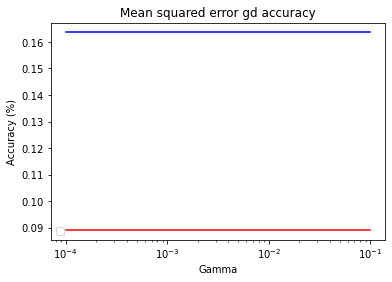

In [ ]:
plt.plot(gammas,accs,"r")
plt.plot(gammas, f1s, "b")

plt.title("Mean squared error gd accuracy")
plt.legend(loc="lower left")
plt.xlabel("Gamma")
plt.ylabel("Accuracy (%)")
plt.xscale('log')
plt.show()